<a href="https://colab.research.google.com/github/log-esh-bug/fake_news_detector/blob/main/scraped_fake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 sec
import pandas as pd
#importing the csv files
real_news = pd.read_csv('/content/scrapedfin1.csv')
fake_news = pd.read_csv('/content/Fake.csv', delimiter=',', quotechar='"', encoding='utf-8')


# dataframe
print(real_news.head())
print(fake_news.head())

                                                text date
0  ost large reci- pients of funding via    elect...  NaN
1  2 held in Gujarat for violence at university b...  NaN
2  (ED), the Central Bureau of Investigation (CBI...  NaN
3  Former U.S. President Do- nald Trump claimed t...  NaN
4  Donald Trump to deliver a profanity-filled ver...  NaN
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    New

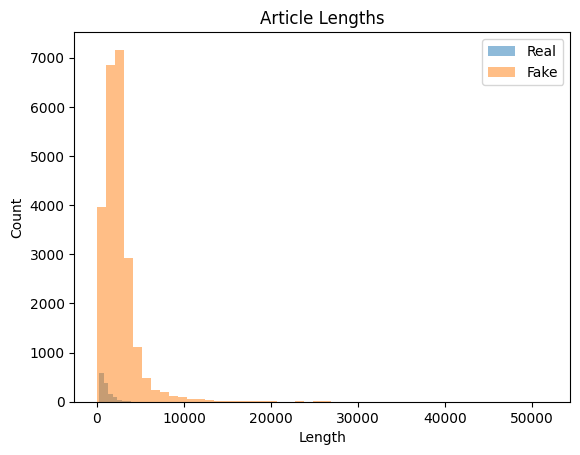

0        747
1       1477
2        751
3        327
4        773
        ... 
1267    1124
1268     986
1269    1017
1270     840
1271    1025
Name: text, Length: 1272, dtype: int64


In [ ]:
#1 sec
import matplotlib.pyplot as plt

real_lengths = real_news['text'].apply(len)
fake_lengths = fake_news['text'].apply(len)

plt.hist(real_lengths, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake')
plt.title('Article Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()
print(real_lengths)

In [ ]:
#2 sec
from collections import Counter
import nltk
#downloading stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# 2 min
def get_most_common_words(texts, num_words=10):
    all_words = []
    for text in texts:
        all_words.extend(nltk.word_tokenize(text.lower()))
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in all_words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

real_words = get_most_common_words(real_news['text'])
fake_words = get_most_common_words(fake_news['text'])

print('Real News:', real_words)
print('Fake News:', fake_words)

Real News: [('said', 1016), ('india', 820), ('new', 513), ('march', 508), ('also', 408), ('crore', 367), ('per', 362), ('e', 336), ('delhi', 303), ('would', 283)]
Fake News: [('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235)]


In [ ]:
#1 sec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#5 min
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]

        # Join the words back into a string
    text = ' '.join(words)

    return text

real_news['text'] = real_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)

In [ ]:
#13 sec
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np

vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(real_news['text'])
X_fake = vectorizer.transform(fake_news['text'])

X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

In [ ]:
#0 sec
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#13 sec
from sklearn.linear_model import LogisticRegression

# Increase max_iter and set solver to 'lbfgs' explicitly
clf = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

In [ ]:
#0 sec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

In [ ]:
#27 min
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
# Train and evaluate a Multinomial Naive Bayes model
print("Training and evaluating Multinomial Naive Bayes model...")
nb = MultinomialNB()
train_and_evaluate_model(nb, X_train, y_train, X_test, y_test)
print()

# Train and evaluate a Support Vector Machine model
print("Training and evaluating Support Vector Machine model...")
svm = SVC()
train_and_evaluate_model(svm,  X_train, y_train, X_test, y_test)

In [ ]:
#1 min
from sklearn.model_selection import GridSearchCV

# Define a list of hyperparameters to search over
hyperparameters = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), hyperparameters, cv=3)
grid_search.fit(X_train, y_train)
655
# Print the best hyperparameters and test accuracy
print('Best hyperparameters:', grid_search.best_params_)
print('Test accuracy:', grid_search.score(X_test, y_test))
print("Done")

In [ ]:
#0 sec
from joblib import dump

dump(clf, 'model.joblib')
dump(vectorizer, 'vectorizer.joblib')

In [ ]:
#for colab
from flask import Flask, request, render_template
from joblib import load
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Load the pre-trained model and vectorizer
clf = load('model.joblib')
vectorizer = load('vectorizer.joblib')

# Define the preprocess_text function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem the words
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

# Initialize Flask app
app = Flask(__name__)

# Define the home route
@app.route('/')
def home():
    return render_template('home.html')

# Define the prediction route
@app.route('/predict', methods=['POST'])
def predict():
    text = request.form['text']
    preprocessed_text = preprocess_text(text)
    X = vectorizer.transform([preprocessed_text])
    y_pred = clf.predict(X)
    result = 'real' if y_pred[0] == 1 else 'fake'
    return render_template('result.html', result=result, text=text)

# Run the Flask app
app.run(host='localhost', port=8080, threaded=True)
